# Notebook for preparing redesign of data management

### Python Libraries?

In [1]:
import pandas as pd
import numpy as np

from urllib.request import urlopen
import json

import time

import requests

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

In [55]:
from plotly.subplots import make_subplots

### Custom Modules

In [3]:
import data_processing
import plotting

%load_ext autoreload

%autoreload 1

%aimport data_processing
%aimport plotting

## Data Importing

### County GeoJson for polygons on choropleth

In [ ]:
# Get the Map of US counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    county_geojson = json.load(response)

In [ ]:
with open('data/county_geojson.json','w') as fout:
    json.dump(county_geojson,fout)

In [ ]:
with open('data/county_geojson.json','r') as fout:
    county_geojson = json.load(fout)

### County Data
This is where we import data from [New York Times GitHub page](https://github.com/nytimes/covid-19-data) to get county level coronavirus data.



In [ ]:
today = time.strftime('%Y%m%d')
filepath = f'data/covid_counties_{today}.csv'
if path.exists(filepath):
    print("Pulling from file.")
    df = pd.read_csv(filepath)
else:
    print("Pulling from github.")
    url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
    df = pd.read_csv(url)
    df.to_csv(filepath)

# Reassign our fips to be a string of length 5
df['fipsnum'] = df['fips']
df['fips'] = df['fipsnum'].astype(str).apply(lambda x: '0'+x[:4] if len(x) == 6 else x[:5])
# Set date format
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
# Create log_deaths column
df['log_deaths'] = np.log(df['deaths'] + 1)

### Using data_processing

In [23]:
COVID_COUNTIES_DF = data_processing.get_covid_county_data()

Retrieving Covid County data
Pulling from file.


In [24]:
date_dict = data_processing.generate_slider_dates(COVID_COUNTIES_DF)

In [28]:
time.strftime('%Y-%m-%d',time.localtime(max(date_dict)))

'2020-08-26'

In [33]:
COVID_COUNTIES_DF['date'].max()

Timestamp('2020-08-26 00:00:00')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

### Get State Data

In [45]:
COVID_STATES_DF = data_processing.get_covid_state_data()

Pulling from file.


In [ ]:
COVID_STATES_DF

In [17]:
COVID_STATES_DF.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'death

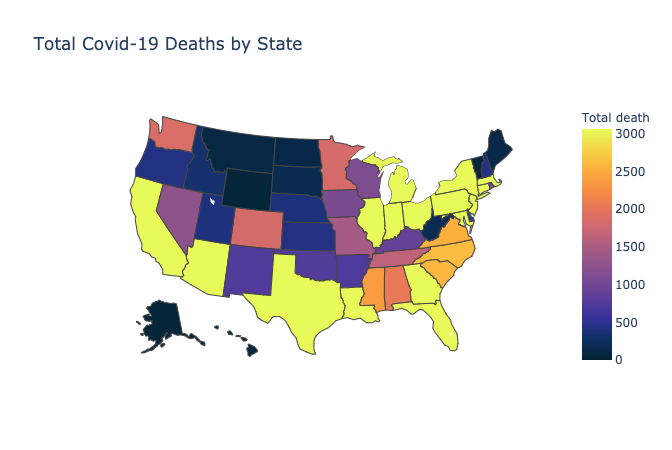

In [36]:
plotting.choropleth_state_deaths_density(COVID_STATES_DF,'death', '2020-08-26')

In [14]:
COVID_STATES_DF.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-08-27,AK,5801.0,330419.0,NaN,43.0,NaN,NaN,NaN,9.0,...,336220,0,0,87c72a3946f8d36630b6b5aa3e426a2222949bcd,0,0,0,0,0,NaN
1,2020-08-27,AL,121023.0,835786.0,NaN,1052.0,14005.0,NaN,1430.0,NaN,...,956809,31,0,010113bf224bc02eaf239a639a4a3228098d1ca4,0,0,0,0,0,NaN
2,2020-08-27,AR,58745.0,631283.0,NaN,433.0,4104.0,NaN,NaN,99.0,...,690028,7,43,7a29e215de264cc6da8c75df7684b76e27b4bc72,0,0,0,0,0,NaN
3,2020-08-27,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,e7544098118fa4e8f18d87f113398f410f7a3fa6,0,0,0,0,0,NaN
4,2020-08-27,AZ,200139.0,974789.0,NaN,895.0,21426.0,311.0,NaN,176.0,...,1174928,33,50,34abe3c1f5b6156a42e89f9eca939cd37084ff0a,0,0,0,0,0,NaN


In [ ]:
COVID_STATES_DF.head()

In [ ]:
state_stats.head()

In [ ]:
# Import the unemployment data because it has the fips codes
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df['prefix'] = [x[:2] for x in df['fips']]

In [ ]:
df.head()

In [ ]:
USA-states

In [ ]:

deaths = states_df.reset_index()
################################################################################
# Read in states data
states = pd.read_csv('./data/tbl_states.csv')

# Fix fips code to be a string, prefix 0 to single digit codes
states['fips'] = states['fips'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [ ]:
df.head()

In [ ]:
states.head()

In [ ]:
merged = pd.merge(df, states, left_on='prefix', right_on='fips', how='outer')

In [ ]:
merged.head()

In [ ]:
states_df.columns

In [ ]:
a = states_df[['state','death','deathIncrease','positive','fips']]

In [ ]:

merged = pd.merge(df, states, left_on='prefix', right_on='fips', how='outer')
    # Rename convention
merged.rename(columns={'fips_x': 'fips_co', 'fips_y':'fips_st'}, inplace=True)

max_date = max(deaths['date'])
deaths = deaths[deaths['date'] == max_date]

final = pd.merge(merged, deaths, how='outer')
final = final.drop(columns=['prefix'])

# Create a log scale of lived in density
final['logd'] = np.log(final['Lived'])

# create a column for death_per_m
x = final['death']*1000000 / final['Pop']
final['death_per_m'] = x.copy()

final['log_std_density'] = np.log(final['Standard'])

In [ ]:
states_df.columns

In [ ]:
final.columns

In [ ]:
final.columns

In [ ]:
final.head()

### Get Dates for Date Slider

In [ ]:
# Get today's datea
date = time.strftime('%Y-%m-%d')
# Set New York for state mask
state = 'New York'

# Only look at New York Dates
state_mask = (df['state'] == state)

# create today's date mask
date_mask = (df['date'] == date)

# Get min date from df
min_date = int(time.mktime(df['date'].min().timetuple()))

# Hardcode a start date
start_date = '2020-03-01'
start_date_int = int(time.mktime(datetime.datetime.strptime(start_date, '%Y-%m-%d').timetuple()))

# Get max date from df
max_date_int = int(time.mktime(df['date'].max().timetuple()))

# Create a list of dates from max to min, going back 2 weeks each time
date_list = range(max_date_int, start_date_int, -(14*24*60*60))
date_dict = {day:time.strftime('%Y-%m-%d',time.localtime(day))  for day in date_list}

### Using data_processing

In [ ]:
date_dict = data_processing.generate_slider_dates(df)

In [ ]:
date_dict

In [ ]:
# Get today's date
time.strftime('%Y-%m-%d', time.localtime())

In [ ]:
time.strftime('%Y-%m-%d')

# Dash Components

In [ ]:
date = '2020-08-26'
date_mask = (df['date'] == date)

In [ ]:
a = round(df[date_mask]['cases'].mean(),-1)

In [ ]:
round(a.mean(),-1)

In [ ]:
AB = pd.DataFrame(df.to_dict())

In [ ]:
AB

In [ ]:
dcc.Store(id='store', data = df)

# Plotly

In [34]:
import plotly.graph_objects as go

In [ ]:
go.Figure()

In [ ]:
go.Choropleth()

In [62]:
STATE_MASK = (COVID_STATES_DF['state'] == 'NY')
DATE_MASK = (COVID_STATES_DF['date']<='2020-04-26')

In [ ]:
COVID_STATES_DF[STATE_MASK & DATE_MASK].sort_values('date')['death'].diff()

In [65]:
COVID_STATES_DF[['date','death','deathIncrease']][STATE_MASK & DATE_MASK]

,date,death,deathIncrease
6925,2020-04-26,16966.0,367
6981,2020-04-25,16599.0,437
7037,2020-04-24,16162.0,422
7093,2020-04-23,15740.0,438
7149,2020-04-22,15302.0,474
7205,2020-04-21,14828.0,481
7261,2020-04-20,14347.0,478
7317,2020-04-19,13869.0,507
7373,2020-04-18,13362.0,540
7429,2020-04-17,12822.0,630


In [52]:
def scatter_deaths_states(covid_state_df,state):
    
    state_mask = (covid_state_df['state'] == state)
    covid_state_df[state_mask]

    fig = go.Figure()
    fig = make_subplots(specs=[[{"secondary_y":True}]])
    fig.update_layout(height=500,title_text="Daily and Total Deaths")
    fig.add_trace(go.Bar(x=covid_state_df[state_mask]['date'],
            y=covid_state_df[state_mask]['deathIncrease'], name="deathIncrease"), secondary_y=False,
        )
    fig.add_trace(
            go.Scatter(x=covid_state_df[state_mask]['date'],
                y=covid_state_df[state_mask]['death'], 
                name="Total"
            ),secondary_y=True
        )
    fig.update_yaxes(title_text="<b>Daily</b> Deaths", secondary_y=False)
    fig.update_yaxes(title_text="<b>Total</b> Deaths to Date", secondary_y=True)

    return fig

In [74]:
a = tuple(('today','tomorrow'))

In [73]:
type(a)

tuple

In [69]:
b, c = a

In [67]:
COVID_STATES_DF.columns

Index(['Unnamed: 0', 'date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResults',
       'totalTestResultsIncrease', 'p

In [66]:
COVID_STATES_DF['deathIncrease'].min()

-213

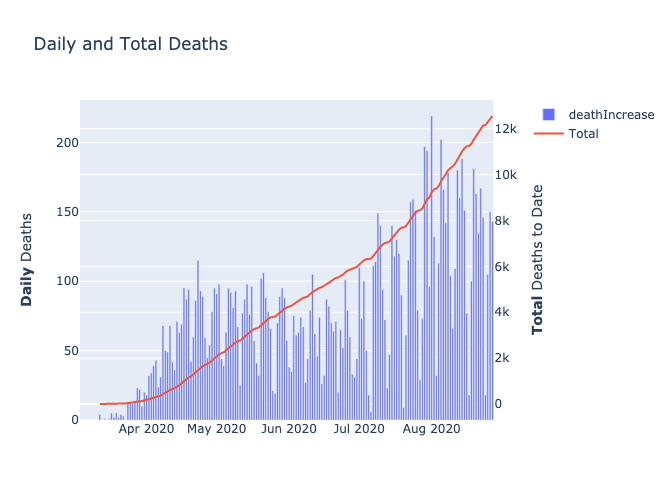

In [57]:
scatter_deaths_states(COVID_STATES_DF, 'CA')